In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
df=pd.read_csv("parkinsons_data.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
# Drop the 'name' column
df.drop(columns=['name'], inplace=True)

In [14]:
# Standardize the features (excluding the 'status' column)
features = df.drop(columns=['status'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [16]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

In [18]:
# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['status'] = df['status']

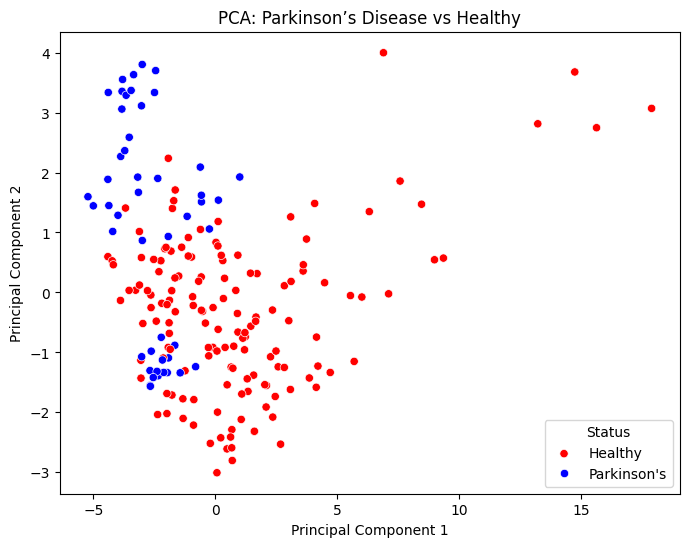

In [20]:
# Check unique status values
if pca_df['status'].nunique() > 1:
    # Scatter plot if there are both classes
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['status'], palette=['blue', 'red'])
    plt.title('PCA: Parkinson’s Disease vs Healthy')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title="Status", labels=["Healthy", "Parkinson's"])
    plt.show()
else:
    print("Warning: Dataset contains only one class (Parkinson's). No class separation visualization possible.")


In [22]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

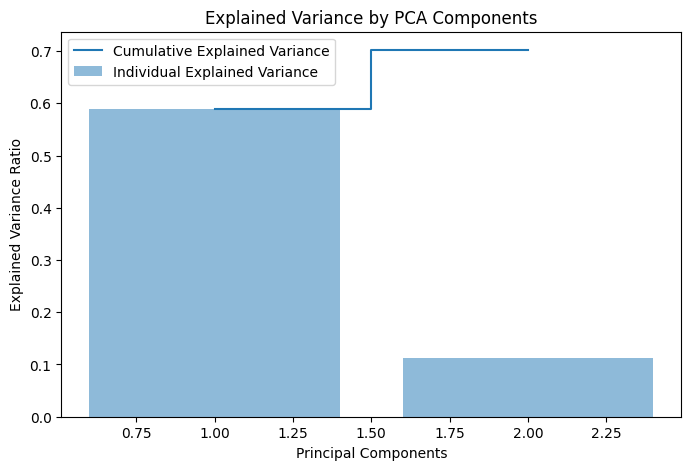

In [24]:
# Plot explained variance
plt.figure(figsize=(8,5))
plt.bar(range(1, 3), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, 3), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.title('Explained Variance by PCA Components')
plt.show()

In [26]:
# Print explained variance ratio
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.58900504 0.1129943 ]
